In [1]:
import pandas as pd
import sqlite3

In [2]:
connection = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
pd.io.sql.read_sql("SELECT * FROM checker;", connection)

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1
3,3,ready,0,2020-04-16 21:46:48.121217,7,lab02,admin_1
4,4,checking,0,2020-04-16 21:53:01.862637,6,code_rvw,admin_1
...,...,...,...,...,...,...,...
3397,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3398,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3399,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3400,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [4]:
views_query = """
SELECT uid, datetime
FROM pageviews
WHERE uid LIKE 'user_%';
"""
views_data = pd.read_sql_query(views_query, connection)

In [5]:
commits_query = """
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%';
"""
commits_data = pd.read_sql_query(commits_query, connection)
commits_data

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [6]:
views_data['datetime'] = pd.to_datetime(views_data['datetime'])
commits_data['datetime'] = pd.to_datetime(commits_data['timestamp'])

In [7]:
views_data['date'] = views_data['datetime'].dt.date
commits_data['date'] = commits_data['datetime'].dt.date

In [8]:
views = views_data.groupby('date').size().reset_index(name='views')
commits  = commits_data.groupby('date').size().reset_index(name='commits')

In [9]:
merged_data = pd.merge(views, commits, on='date', how='inner')
merged_data.head()

,date,views,commits
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28


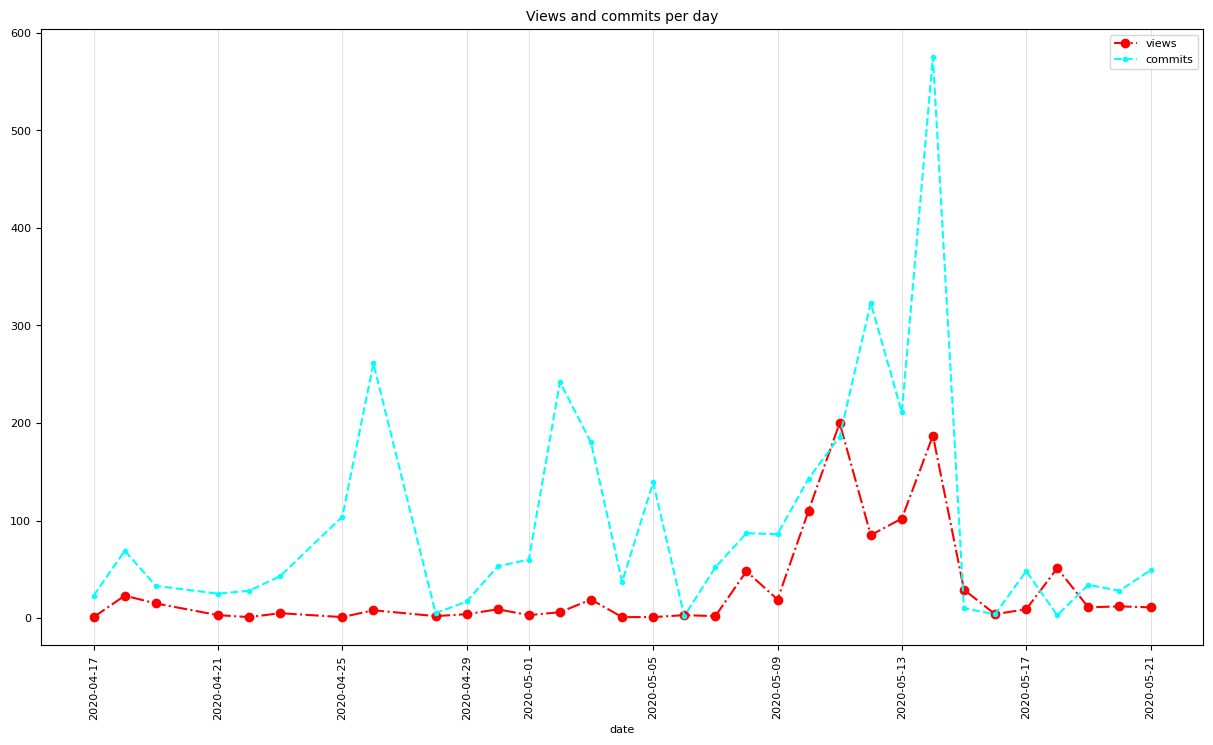

In [10]:
ax = merged_data.plot(
    x='date', 
    y='views', 
    kind='line', 
    figsize=(15, 8), 
    color='red', 
    linestyle='-.', 
    marker='o', 
    label='views',
    grid=True
)
merged_data.plot(
    x='date', 
    y='commits', 
    kind='line', 
    ax=ax, 
    color='cyan', 
    linestyle='--', 
    marker='.', 
    label='commits'
)
ax.set_title('Views and commits per day', fontsize=10)
ax.set_xlabel('date', fontsize=8)
ax.set_ylabel('', fontsize=8)
ax.legend(fontsize=8)
ax.tick_params(axis='x', labelrotation=90, labelsize=8)
ax.tick_params(axis='y', labelsize=8)

ax.grid(visible=True, which='major', axis='x', color='lightgrey', linestyle='-', linewidth=0.5)


In [11]:
views_over_150 = merged_data[merged_data['views'] > 150].shape[0]

How many times was the number of views larger than 150?

In [56]:
print(f"The answer is: {views_over_150}")

The answer is: 2
